In [1]:
import pandas as pd
import numpy as np

Load Data
---

In [2]:
energy_2018 = pd.read_csv("data/nordpool2018_clean.csv")
energy_2017 = pd.read_csv("data/nordpool2017_clean.csv")
energy_2016 = pd.read_csv("data/nordpool2016_clean.csv")

In [3]:
energy = pd.concat([energy_2017, energy_2016, energy_2018])
energy['date'] = pd.to_datetime(energy['date'])
energy = energy.sort_values(by=['date'])

energy.head()

,price,date,hour,day,month,year
23,149.13,2016-01-01,23,1,1,2016
22,153.71,2016-01-01,22,1,1,2016
0,150.41,2016-01-01,0,1,1,2016
1,147.20,2016-01-01,1,1,1,2016
2,144.45,2016-01-01,2,1,1,2016


Price Over Time
---

In [4]:
import seaborn as sb
import matplotlib.pyplot as plt

periods = [
    (1, "hour"),
    (24, "day"), 
    (24 * 7, "week"),
    (24 * 30, "month") 
]

for period, name in periods:
    fig, ax = plt.subplots(1, figsize=(20, 5))
    mean = []
    std = []
    for time in list(zip(*(iter(energy['price']), ) * period)):
        mean.append(np.mean(time))
        #if np.std(time) != np.std(time):
         #   print(time)
        std.append(np.std(time))
    
    mean = np.array(mean)
    std = np.array(std)
    
    sb.lineplot(np.arange(mean.shape[0]), mean, ax=ax)
    ax.fill_between(np.arange(mean.shape[0]), mean + std * 1, mean - std * 1, alpha=0.3)
    ax.set_title("Price per %s" % name)
    ax.set_ylabel("Price per MW/h")
    ax.set_xlabel("%s" % name)
    



Price of a time
---

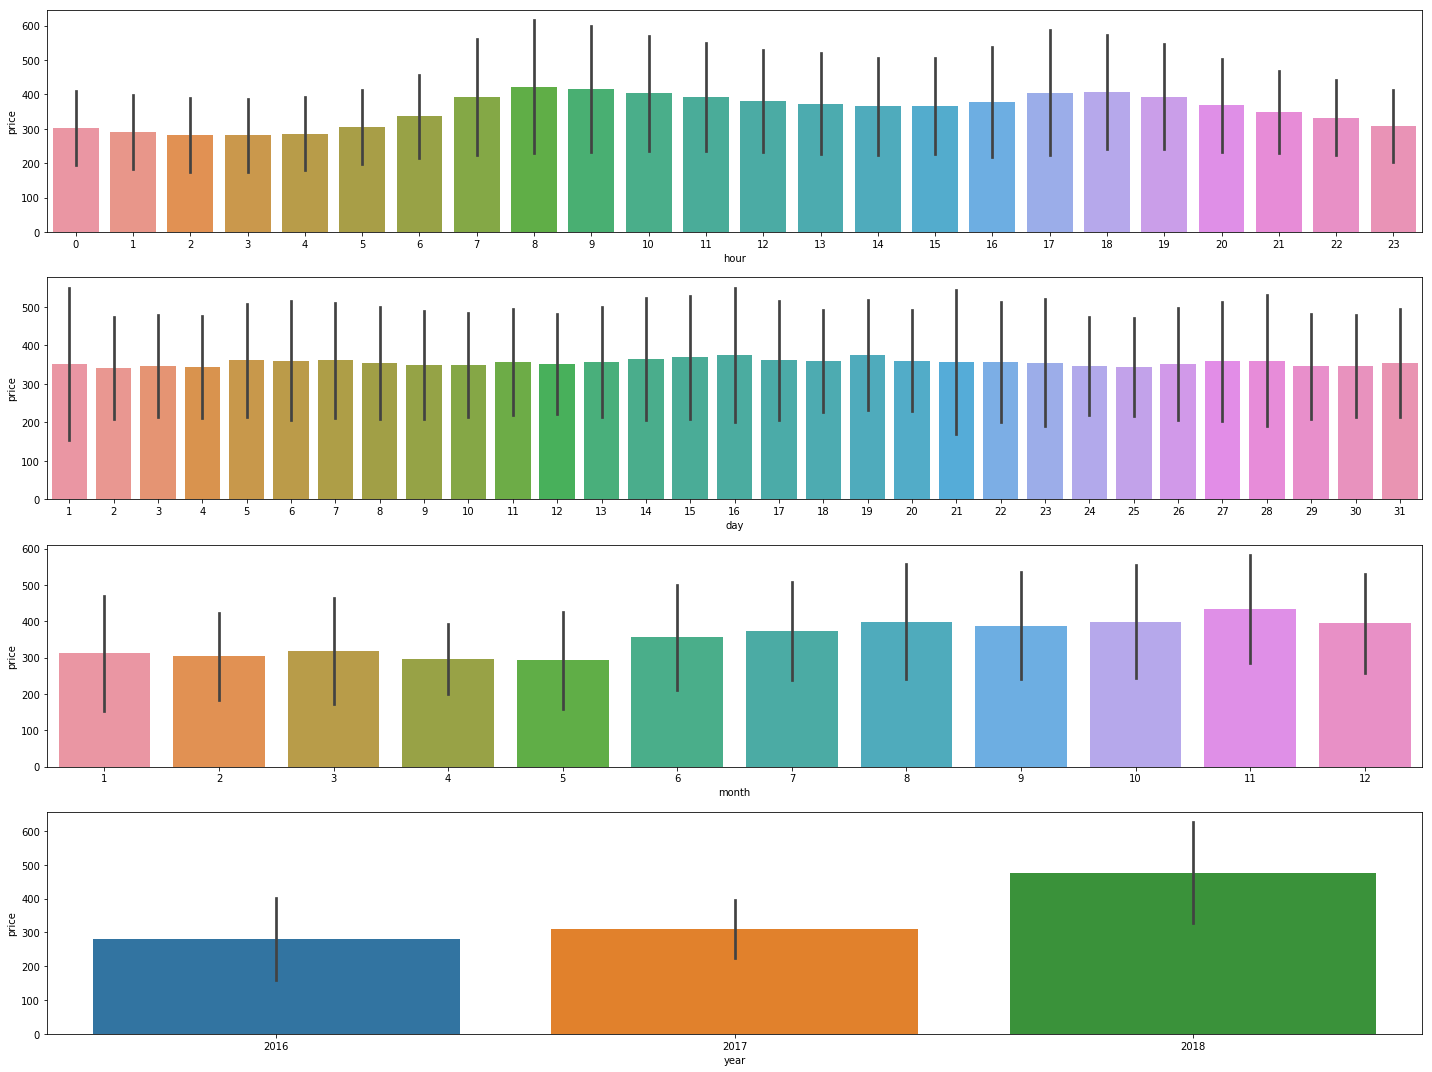

In [5]:
import seaborn as sb
import matplotlib.pyplot as plt

fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, figsize=(20, 15))

sb.barplot(x="hour", y="price", data=energy, ci="sd", ax=ax1)
sb.barplot(x="day", y="price", data=energy, ci="sd", ax=ax2)
sb.barplot(x="month", y="price", data=energy, ci="sd", ax=ax3)
sb.barplot(x="year", y="price", data=energy, ci="sd", ax=ax4)

fig.tight_layout()

Weather Data
---

In [6]:
weather = pd.read_csv("data/weather_1_clean.csv")

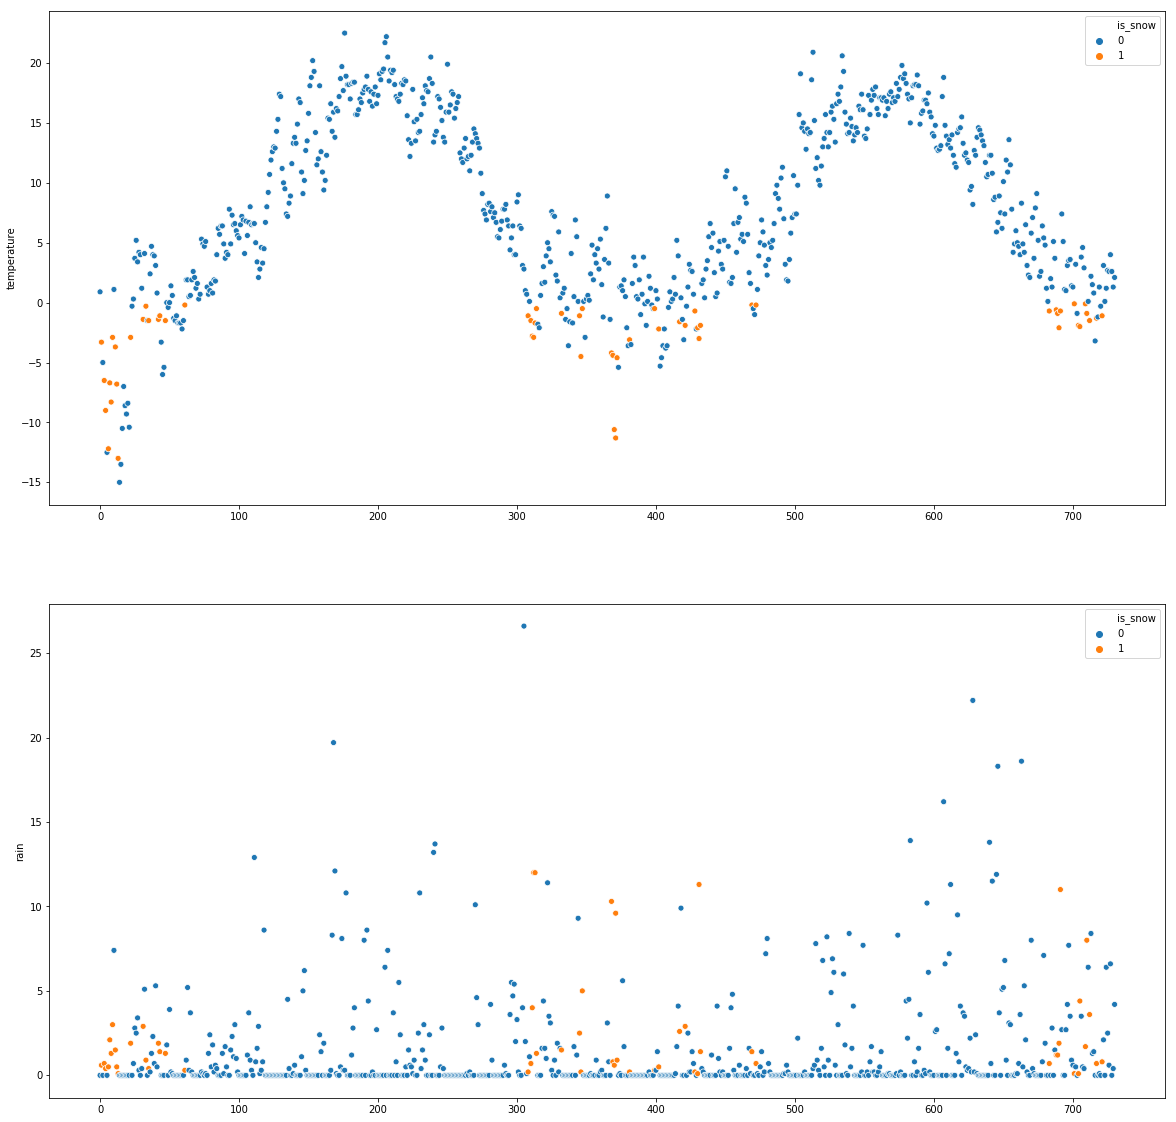

In [7]:
weather.describe()

fig, (ax1, ax2) = plt.subplots(2, figsize=(20, 20))

#hues = weather["is_snow"].apply(lambda x: x == 1  , axis=1)

sb.scatterplot(np.arange(weather["temperature"].size), weather["temperature"], hue=weather["is_snow"], ax=ax1)
sb.scatterplot(np.arange(weather["rain"].size), weather["rain"], hue=weather["is_snow"], ax=ax2)
plt.show()

Combination
---

In [8]:
weather_avg_price = weather.copy()
weather_avg_price["price"] =\
    [np.mean(price) 
     for price in list(zip(*(iter(energy['price']), ) * 24))][:731]


In [9]:
weather_norm = weather_avg_price.drop(columns="date")
weather_norm = (weather_norm - weather_norm.mean()) / weather_norm.std()

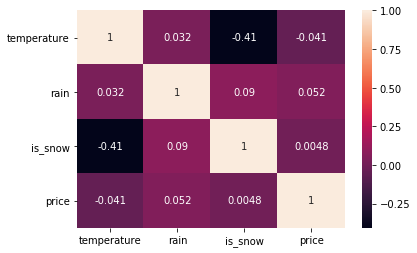

In [10]:
import seaborn as sb

sb.heatmap(weather_norm.corr(method="pearson"), annot=weather_norm.corr(method="pearson"))
plt.show()

Solution
---

KeyboardInterrupt: 

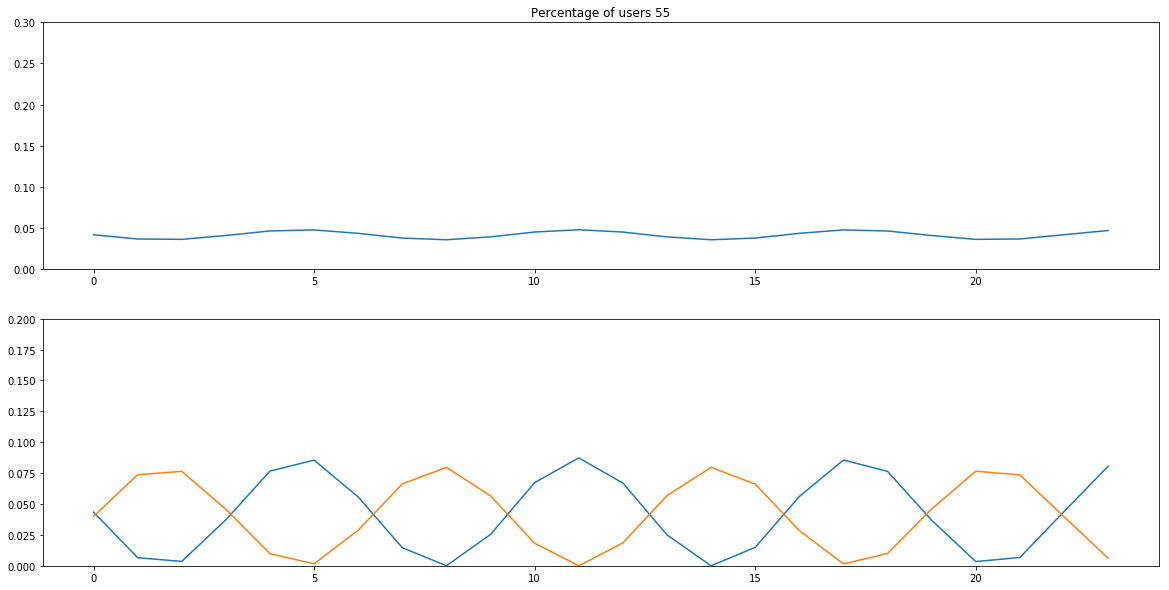

In [14]:
import api.unergygorithm as unregygorithm
import matplotlib.pyplot as plt

fig, (ax, axpdfs) = plt.subplots(2, figsize=(20, 10))


unregygorithm.demo(np.sin(np.arange(24)) + 1, fig, ax, axpdfs, speed=0.1)